In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
dataV2= pd.read_csv(r"C:\Ran\Berkeley\IEOR\290\Project\Data\TrainingDatasetV2.csv",encoding = "latin1")
dataV2.head()

D:\Anaconda\envs\data-x\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (12,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,Country of profile,Education,...,Company,Company_Norm,Ticker,Exchange,Location,Industry,Layoff Date,Company Name,Employees Affected,laid_off
0,6b89d91d-7b71-37fe-bb4c-0084018d63c0,2001,0,Software Engineering,0.570285,Web Development,0.277136,San Ramon,United States,0,...,VMware,VMware,VMW,XNYS,"san francisco, ca",541512,3/12/2018,"VMware, Inc",159,0.0
1,6b89d91d-7b71-37fe-bb4c-0084018d63c0,2001,0,Software Engineering,0.570285,Web Development,0.277136,San Ramon,United States,0,...,VMware,VMware,VMW,XNYS,"san francisco, ca",541512,3/28/2016,"VMware, Inc",170,0.0
2,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,Software Engineering,0.664485,Web Development,0.236152,San Francisco,United States,5,...,Intel Corporation,Intel Corporation,INTC,XNAS,"portland, oregon area",334413,6/30/2018,Intel Corporation,65,0.0
3,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,Software Engineering,0.664485,Web Development,0.236152,San Francisco,United States,5,...,Intel Corporation,Intel Corporation,INTC,XNAS,"portland, oregon area",334413,2/24/2017,Intel Corporation,54,0.0
4,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,Software Engineering,0.664485,Web Development,0.236152,San Francisco,United States,5,...,Intel Corporation,Intel Corporation,INTC,XNAS,"portland, oregon area",334413,7/15/2015,Intel Corporation,165,0.0


In [2]:
# use one-hot encoding to encode skillsets
encodeSkill1 = pd.get_dummies(dataV2['Skillset1'], prefix = 's1', prefix_sep='-')
encodeSkill2 = pd.get_dummies(dataV2['Skillset2'], prefix = 's2', prefix_sep='-') 
dataV2 = dataV2.drop(['Skillset1','Skillset2'], axis = 1)
dataV2 = dataV2.join(encodeSkill1) 
dataV2 = dataV2.join(encodeSkill2)
dataV2.head()

,ID,Birth Year,Gender Flag,Skillset1 Weight,Skillset2 Weight,City of profile,Country of profile,Education,Elite Institution,Start Date,...,s2-Product Management,s2-Public Policy,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development
0,6b89d91d-7b71-37fe-bb4c-0084018d63c0,2001,0,0.570285,0.277136,San Ramon,United States,0,0,2007/1/1,...,0,0,0,0,0,0,0,0,0,1
1,6b89d91d-7b71-37fe-bb4c-0084018d63c0,2001,0,0.570285,0.277136,San Ramon,United States,0,0,2007/1/1,...,0,0,0,0,0,0,0,0,0,1
2,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,0.664485,0.236152,San Francisco,United States,5,0,2016/5/1,...,0,0,0,0,0,0,0,0,0,1
3,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,0.664485,0.236152,San Francisco,United States,5,0,2016/5/1,...,0,0,0,0,0,0,0,0,0,1
4,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,0.664485,0.236152,San Francisco,United States,5,0,2016/5/1,...,0,0,0,0,0,0,0,0,0,1


In [3]:
dataV2.dtypes

ID                                          object
Birth Year                                  object
Gender Flag                                  int64
Skillset1 Weight                           float64
Skillset2 Weight                           float64
City of profile                             object
Country of profile                          object
Education                                    int64
Elite Institution                            int64
Start Date                                  object
StartFlag                                   object
End Date                                    object
EndFlag                                      int64
CurrentEmployFlag                            int64
Length                                       int64
Role                                        object
Dept                                        object
Company                                     object
Company_Norm                                object
Ticker                         

In [4]:
dataV2.columns

Index(['ID', 'Birth Year', 'Gender Flag', 'Skillset1 Weight',
       'Skillset2 Weight', 'City of profile', 'Country of profile',
       'Education', 'Elite Institution', 'Start Date', 'StartFlag', 'End Date',
       'EndFlag', 'CurrentEmployFlag', 'Length', 'Role', 'Dept', 'Company',
       'Company_Norm', 'Ticker', 'Exchange', 'Location', 'Industry',
       'Layoff Date', 'Company Name', 'Employees Affected', 'laid_off',
       's1-Administration', 's1-Business Development', 's1-Data Analysis',
       's1-Design', 's1-Digital Marketing', 's1-Electrical Engineering',
       's1-Energy, Oil, and Gas', 's1-Finance', 's1-Healthcare',
       's1-Hospitality', 's1-Human Resources', 's1-IT Management and Support',
       's1-Industrial Management', 's1-Insurance', 's1-Legal', 's1-Logistics',
       's1-Manufacturing and Process Management', 's1-Military',
       's1-Mobile Telecommunications', 's1-Musical Production',
       's1-Non-Profit and Community', 's1-Operations Management',
       

In [5]:
dataV2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106108 entries, 0 to 106107
Data columns (total 91 columns):
ID                                         106108 non-null object
Birth Year                                 106108 non-null object
Gender Flag                                106108 non-null int64
Skillset1 Weight                           106108 non-null float64
Skillset2 Weight                           106108 non-null float64
City of profile                            97438 non-null object
Country of profile                         106108 non-null object
Education                                  106108 non-null int64
Elite Institution                          106108 non-null int64
Start Date                                 106108 non-null object
StartFlag                                  106108 non-null object
End Date                                   106108 non-null object
EndFlag                                    106108 non-null int64
CurrentEmployFlag                 

In [6]:
dataV2 = dataV2.dropna(subset=['laid_off'])
dataV2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106101 entries, 0 to 106107
Data columns (total 91 columns):
ID                                         106101 non-null object
Birth Year                                 106101 non-null object
Gender Flag                                106101 non-null int64
Skillset1 Weight                           106101 non-null float64
Skillset2 Weight                           106101 non-null float64
City of profile                            97431 non-null object
Country of profile                         106101 non-null object
Education                                  106101 non-null int64
Elite Institution                          106101 non-null int64
Start Date                                 106101 non-null object
StartFlag                                  106101 non-null object
End Date                                   106101 non-null object
EndFlag                                    106101 non-null int64
CurrentEmployFlag                 

In [7]:
dataV2 = dataV2[dataV2['Birth Year' ]!= 'None']
dataV2['Birth Year'] = dataV2['Birth Year'].astype(float)
dataV2 = dataV2.dropna(subset=['Length'])

In [8]:
print(len(dataV2[dataV2['laid_off']==1]))
print(len(dataV2[dataV2['laid_off']==0]))

8038
98023


In [9]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
y = dataV2['laid_off']
X = dataV2.drop(['ID',
       'City of profile', 'Country of profile','Elite Institution',
       'Start Date', 'StartFlag', 'End Date',
       'EndFlag', 'CurrentEmployFlag', 'laid_off', 'Role', 'Dept', 'Company',
       'Company_Norm', 'Ticker', 'Exchange', 'Location',
       'Industry', 'Layoff Date', 'Company Name'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


D:\Anaconda\envs\data-x\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
logreg.score(X_test,y_test)

0.9266790282535592

In [11]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))

5705
68537


In [12]:
print(len(y_test[y_test == 1]))
print(len(y_test[y_test == 0]))

2333
29486


In [13]:
# calculate confusion matrix & precision, recall, f-score
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_test 
y_pred = logreg.predict(X_test)
CM = pd.DataFrame(confusion_matrix(y_true, y_pred),columns = ['Predicted 0','Predicted 1'],\
                  index = ['Actual 0','Actual 1']
                 )
print ('Confusion matrix of test data is: \n', CM)

Confusion matrix of test data is: 
           Predicted 0  Predicted 1
Actual 0        29486            0
Actual 1         2333            0


In [14]:
target_names = ['non-laid_off', 'laid_off']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-laid_off       0.93      1.00      0.96     29486
    laid_off       0.00      0.00      0.00      2333

   micro avg       0.93      0.93      0.93     31819
   macro avg       0.46      0.50      0.48     31819
weighted avg       0.86      0.93      0.89     31819



D:\Anaconda\envs\data-x\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## From the result above, the prediction for laid_off is bad since the dataset is imbalanced: the number of non-laid_off(laid_off = 0) is much more than the number of laid_off(laid_off = 1)

In [15]:
# Method 1
# since tree-based model is less sensitive to imbalanced dataset,try random forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF.score(X_test,y_test)

D:\Anaconda\envs\data-x\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9310789151136114

In [16]:
# hypermarameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [10, 20, 40,60,80, 120]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 40, 60, 80, 120]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
# best number of trees
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

print_grid_search_metrics(Grid_RF)

Best score: 0.927
Best parameters set:
	n_estimators: 20


In [18]:
# feature importance
importances = RF.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X_train.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Employees Affected: 0.1535
Length: 0.1531
Skillset2 Weight: 0.1524
Skillset1 Weight: 0.1524
Birth Year: 0.1066
Education: 0.0442
Gender Flag: 0.0292
s2-Software Engineering: 0.01
s2-Administration: 0.0096
s2-Sales: 0.0083
s2-IT Management and Support: 0.0078
s1-Software Engineering: 0.0078
s2-Mobile Telecommunications: 0.0074
s1-Mobile Telecommunications: 0.007
s2-Web Development: 0.0065
s2-Electrical Engineering: 0.0065
s1-Electrical Engineering: 0.0065
s1-Sales: 0.0062
s1-Administration: 0.0062
s2-Product Management: 0.0061
s2-Business Development: 0.0058
s2-Data Analysis: 0.0056
s2-Human Resources: 0.0055
s1-Product Management: 0.0055
s1-IT Management and Support: 0.0052
s1-Human Resources: 0.0042
s1-Web Design: 0.0041
s1-Digital Marketing: 0.0041
s1-Web Development: 0.004
s2-Digital Marketing: 0.0039
s2-Web Design: 0.0038
s1-Business Development: 0.0038
s2-Manufacturing and Process Management: 0.0037
s2-Finance: 0.0036
s2-Operation

In [19]:
# Method 2
# drop non-laid_off data to get balance dataset, make ratio of not_laid_off/laid_off<=10
not_laid_off = dataV2[dataV2['laid_off'] == 0]
laid_off = dataV2[dataV2['laid_off'] == 1]
np.random.seed(101)
drop_indices = np.random.choice(not_laid_off.index, 90000, replace=False)
not_laid_off = not_laid_off.drop(drop_indices)

dataV2 = pd.concat([not_laid_off, laid_off])
print('Training data size after dropping excessive observations: ', dataV2.shape)


Training data size after dropping excessive observations:  (16061, 91)


In [20]:
y = dataV2['laid_off']
X = dataV2.drop(['ID',
       'City of profile', 'Country of profile','Elite Institution',
       'Start Date', 'StartFlag', 'End Date',
       'EndFlag', 'CurrentEmployFlag', 'laid_off', 'Role', 'Dept', 'Company',
       'Company_Norm', 'Ticker', 'Exchange', 'Location',
       'Industry', 'Layoff Date', 'Company Name'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

D:\Anaconda\envs\data-x\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
logreg.score(X_test,y_test)

0.6003320190910978

In [22]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))

5659
5583


In [23]:
print(len(y_test[y_test == 1]))
print(len(y_test[y_test == 0]))

2379
2440


In [24]:
# calculate confusion matrix & precision, recall, f-score
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_test 
y_pred = logreg.predict(X_test)
CM = pd.DataFrame(confusion_matrix(y_true, y_pred),columns = ['Predicted 0','Predicted 1'],\
                  index = ['Actual 0','Actual 1']
                 )
print ('Confusion matrix of test data is: \n', CM)

Confusion matrix of test data is: 
           Predicted 0  Predicted 1
Actual 0         1421         1019
Actual 1          907         1472


In [25]:
target_names = ['non-laid_off', 'laid_off']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-laid_off       0.61      0.58      0.60      2440
    laid_off       0.59      0.62      0.60      2379

   micro avg       0.60      0.60      0.60      4819
   macro avg       0.60      0.60      0.60      4819
weighted avg       0.60      0.60      0.60      4819



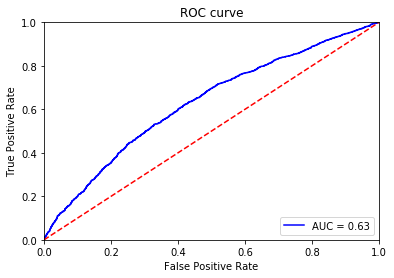

In [26]:
from sklearn.metrics import roc_curve,auc
prob = logreg.predict_proba(X_test)
pred = prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.title("ROC curve")
plt.plot(fpr,tpr,'b',label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
parameters = {
    'n_estimators' : [10, 20, 40,60,80, 120]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv = 5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 40, 60, 80, 120]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
print_grid_search_metrics(Grid_RF)

Best score: 0.688
Best parameters set:
	n_estimators: 80
